In [2]:
import matplotlib.pyplot as plt
import xlrd

In [9]:
def plot_reward(parameter, sheet, paraname, img):
    episodes = [sheet.cell(i+1, 0).value for i in range(200)]
    reward0 = [sheet.cell(i+1, 1).value for i in range(200)]
    reward1 = [sheet.cell(i+1, 2).value for i in range(200)]
    reward2 = [sheet.cell(i+1, 3).value for i in range(200)]
    reward3 = [sheet.cell(i+1, 4).value for i in range(200)]
    reward4 = [sheet.cell(i+1, 5).value for i in range(200)]
    reward5 = [sheet.cell(i+1, 6).value for i in range(200)]
    img.plot(episodes, reward0)
    img.plot(episodes, reward1)
    img.plot(episodes, reward2)
    img.plot(episodes, reward3)
    img.plot(episodes, reward4)
    img.plot(episodes, reward5)
    img.grid(alpha=0.4)
    img.set_xlabel("Training episodes")
    img.set_ylabel("Average System Reward")
    img.legend(["%s = %s"%(paraname, i) for i in parameter])
    # plt.savefig("graphs/498/%s_change_%s.png"%(model, paraname))

In [4]:
rworkbook = xlrd.open_workbook("excel/final.xls")

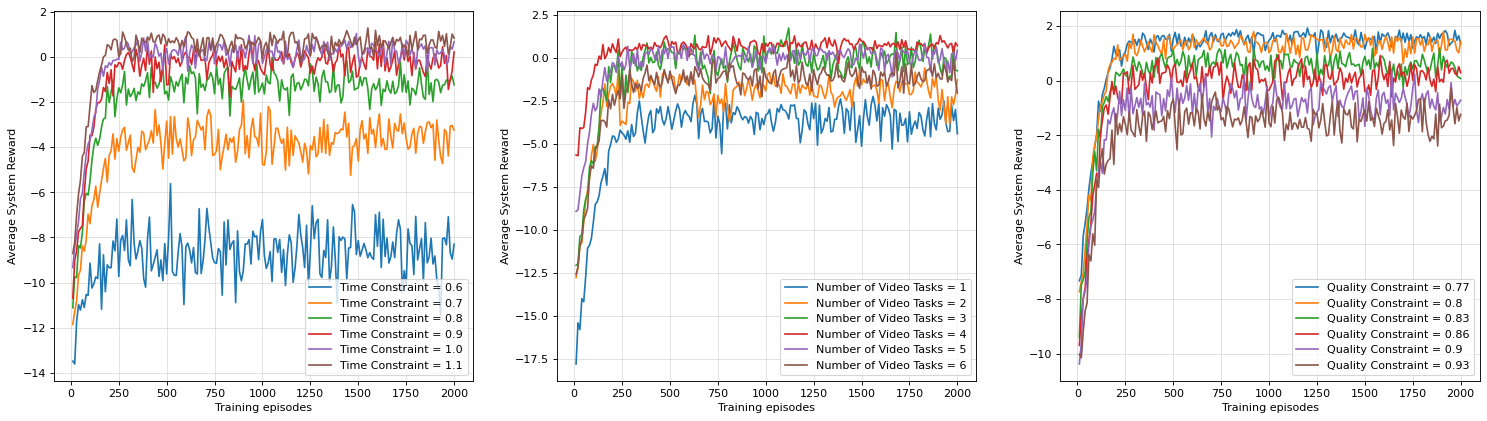

In [10]:
tau = ["0.6", "0.7", "0.8", "0.9", "1.0", "1.1"]
agents = ["1", "2", "3", "4", "5", "6"]
epsilon = ["0.77", "0.80", "0.83", "0.86", "0.90", "0.93"]
sheet_ddpg_ddl = rworkbook.sheet_by_name("ddpg_ddl")
sheet_ddpg_agents = rworkbook.sheet_by_name("ddpg_agents")
sheet_ddpg_epsilon = rworkbook.sheet_by_name("ddpg_epsilon")
plt.figure(figsize=(23,6), dpi=80)
plt.figure(1)
img1 = plt.subplot(131)
plot_reward(tau, sheet_ddpg_ddl, "Time Constraint", img1)
img2 = plt.subplot(132)
plot_reward(agents, sheet_ddpg_agents, "Number of Video Tasks", img2)
img3 = plt.subplot(133)
plot_reward(epsilon, sheet_ddpg_epsilon, "Quality Constraint", img3)
plt.savefig("graphs/498/convergence.png")

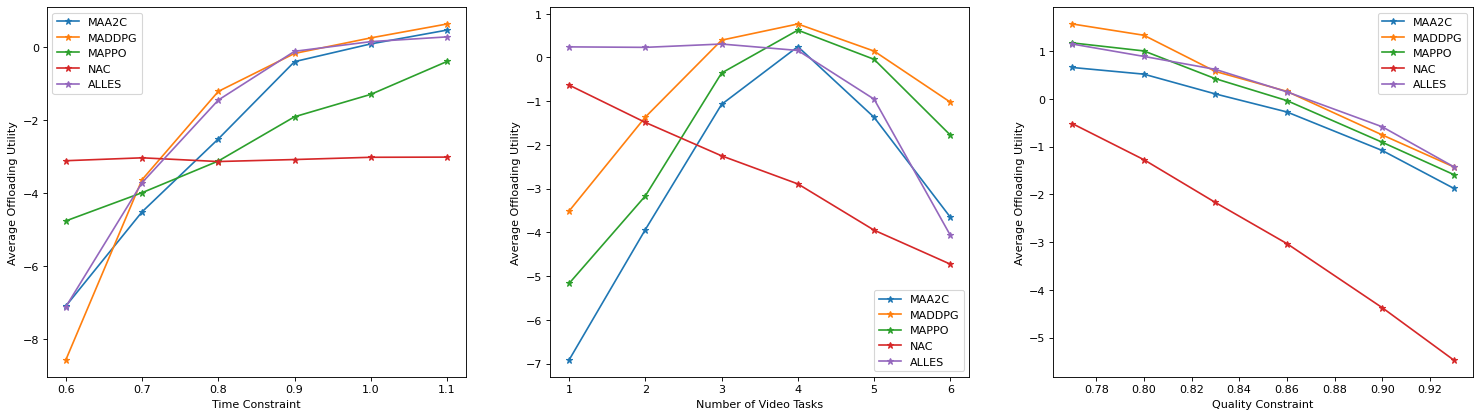

In [15]:
def plot_reward_avg(parameter, paralist, paraname, img):
    sheet_a2c = rworkbook.sheet_by_name("a2c_%s"%parameter)
    sheet_ddpg = rworkbook.sheet_by_name("ddpg_%s"%parameter)
    sheet_ppo = rworkbook.sheet_by_name("ppo_%s"%parameter)
    sheet_NAC = rworkbook.sheet_by_name("NAC_%s"%parameter)
    sheet_ALLES = rworkbook.sheet_by_name("ALLES_%s"%parameter)
    reward_a2c = [sheet_a2c.cell(201, i+1).value for i in range(6)]
    reward_ddpg = [sheet_ddpg.cell(201, i+1).value for i in range(6)]
    reward_ppo = [sheet_ppo.cell(201, i+1).value for i in range(6)]
    reward_NAC = [sheet_NAC.cell(201, i+1).value for i in range(6)]
    reward_ALLES = [sheet_ALLES.cell(201, i+1).value for i in range(6)]

    img.plot(paralist, reward_a2c, "*-")
    img.plot(paralist, reward_ddpg, "*-")
    img.plot(paralist, reward_ppo, "*-") 
    img.plot(paralist, reward_NAC, "*-") 
    img.plot(paralist, reward_ALLES, "*-") 
    img.set_xlabel(paraname)
    img.set_ylabel("Average Offloading Utility")
    img.legend(["MAA2C", "MADDPG", "MAPPO", "NAC", "ALLES"])
plt.close()
plt.figure(figsize=(23,6), dpi=80)
plt.figure(1)
img1 = plt.subplot(131)
img2 = plt.subplot(132)
img3 = plt.subplot(133)
plot_reward_avg("ddl", tau, "Time Constraint", img1)
plot_reward_avg("agents", agents, "Number of Video Tasks", img2)
plot_reward_avg("epsilon", epsilon, "Quality Constraint", img3)
plt.savefig("graphs/498/reward_vs_parameter.png")
